## Sağlık Sigortası Masrafları Analizi

Bu Jupyter Notebook, bireylerin sağlık sigortası masraflarını ve bu masrafları etkileyebilecek faktörleri analiz eder. Veri seti, her bir birey için yaş, cinsiyet, vücut kitle indeksi (BMI), çocuk sayısı, sigara kullanımı ve ABD'deki coğrafi bölge gibi çeşitli özellikler içerir.

### Veri Seti Hakkında
- `age`: Bireyin yaşı.
- `sex`: Bireyin cinsiyeti (erkek/kadın).
- `bmi`: Bireyin vücut kitle indeksi.
- `children`: Bireyin sahip olduğu çocuk sayısı.
- `smoker`: Bireyin sigara kullanıp kullanmadığı.
- `region`: Bireyin ABD'deki coğrafi bölgesi.
- `charges`: Bireyin sağlık sigortası masrafları.

### Analiz Hedefi
Bu analizin amacı, sağlık sigortası masraflarını en iyi şekilde tahmin edebilen bir model geliştirmektir. Bu, sigorta şirketlerinin risk değerlendirmesi yapmasına ve bireylerin sigorta primlerini daha adil bir şekilde belirlemesine yardımcı olabilir.

### Metodoloji
Analiz, veri temizleme, ön işleme, modelleme, model değerlendirme ve sonuçların yorumlanması adımlarını içerir. Çoklu doğrusal regresyon modeli, masrafları tahmin etmek için kullanılacaktır.


### Veri Setinin İçe Aktarılması

In [1]:
import pandas as pd
data = pd.read_csv("./datasets/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Veri Setinin Keşfedilmesi ve Temizlenmesi

In [2]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    
check_df(data)

##################### Shape #####################
(1338, 7)
##################### Types #####################
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
##################### Tail #####################
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603
##################### NA #####################
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
##################### Quantiles #####################
           count          mean           std        min         0%         5%  \
age 

### Veri Seti Özeti

Bu veri seti, 1338 gözlem ve 7 değişkenden oluşmaktadır. Değişkenler ve veri tipleri şu şekildedir:

- `age`: sayısal
- `sex`: kategorik
- `bmi`: sayısal 
- `children`: sayısal 
- `smoker`:  kategorik
- `region`:  kategorik
- `charges`: sayısal 

### Veri Seti Özet İncelemesi

**Eksik Değerler:** Veri setinde hiç eksik değer (NA) bulunmamaktadır. Bu, veri ön işleme aşamasında eksik veri doldurma veya silme işlemlerine ihtiyaç duyulmadığını gösterir.

**Quantiles:** Veri setindeki değişkenlerin çeşitli yüzdelik değerleri sağlanmıştır. Bu, veri dağılımının genel bir görünümünü sağlar.

- `age`: 18 ila 64 yaş aralığında dağılım göstermektedir, medyan yaşı 39'dur.
- `bmi`: 15.96'dan 53.13'e kadar değişen değerlere sahiptir, medyan BMI 30.4'tür. 95. yüzdelik 41.106 ve 99. yüzdelik 46.408'dir, bu da bazı bireylerin yüksek BMI değerlerine sahip olduğunu gösterir.
- `children`: 0 ila 5 arasında çocuk sayısı değişmektedir, medyan çocuk sayısı 1'dir. 99. yüzdelik değeri 5'tir, bu da çok az sayıda ailenin 5 çocuğa sahip olduğunu gösterir.
- `charges`: Sağlık sigortası masrafları 1121.87'den 63770.43'e kadar değişmektedir. Medyan masraf 9382.033'tür, ancak 95. ve 99. yüzdelikler sırasıyla 41181.828 ve 48537.481'dir, bu da masrafların önemli bir kısmının yüksek olduğunu gösterir.

## Keşifçi Veri Analizi

#### Tek Değişkenli Analiz
**Sayısal Değişkenler**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


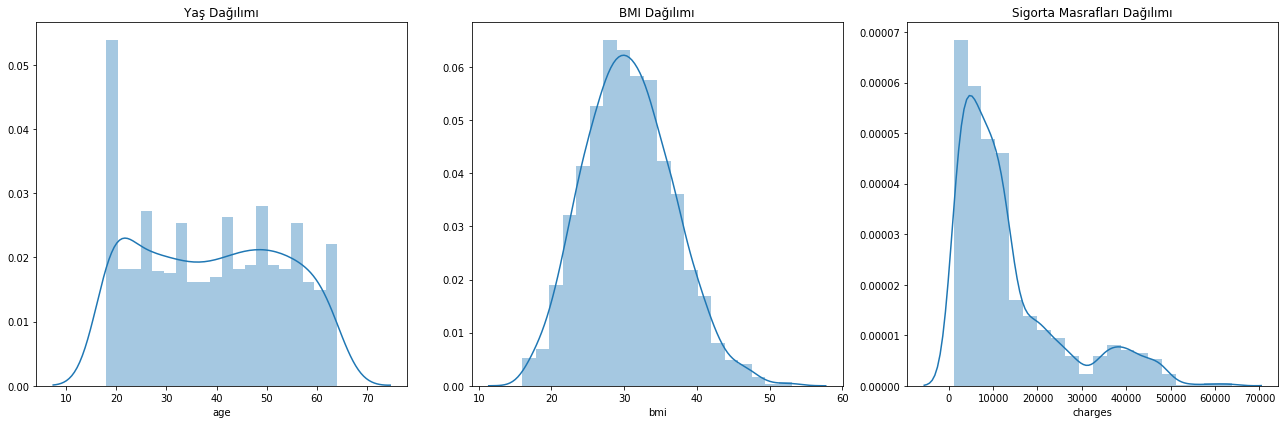

In [4]:
# Sayısal Değişkenler için Histogramlar
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.distplot(data['age'], bins=20, kde=True, ax=ax[0])
ax[0].set_title('Yaş Dağılımı')
sns.distplot(data['bmi'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('BMI Dağılımı')
sns.distplot(data['charges'], bins=20, kde=True, ax=ax[2])
ax[2].set_title('Sigorta Masrafları Dağılımı')

plt.tight_layout()
plt.show()

##### BMI Değerlerinin Analizi
- Histogram analizi, BMI değerlerinin çoğunlukla **25-35 aralığında** yoğunlaştığını göstermektedir. Bu durum, veri setindeki bireylerin büyük bir kısmının **fazla kilolu** (BMI 25-29.9) veya **obez** (BMI 30 ve üzeri) kategorisinde olabileceğine işaret etmektedir.

###### Potansiyel Etkiler
- **Sağlık Durumu:** Yüksek BMI değerleri, kalp hastalıkları, diyabet ve bazı kanser türleri gibi çeşitli sağlık sorunlarının riskini artırabilir.
- **Sağlık Sigortası Masrafları:** Artan sağlık riskleri, bireylerin ve sigorta şirketlerinin karşılaşabileceği sağlık sigortası masraflarında potansiyel bir artışa yol açabilir.

#####  Sağlık Sigortası Masraflarının Analizi
- Histogram, çoğu bireyin **düşük ila orta aralıkta masraflara** sahip olduğunu, ancak az sayıda bireyin **çok yüksek masraflara** sahip olduğunu göstererek sağa çarpık bir dağılım sergilemektedir.

###### Potansiyel Etkiler
- **Sağlık Riskleri:** Yüksek masraflara sahip bireyler, yüksek sağlık riskleri taşıyan veya pahalı tıbbi müdahalelere ihtiyaç duyan bireyler olabilir.
- **Sigorta Şirketleri:** Bu dağılım, sigorta şirketlerinin risk yönetimi ve prim belirleme stratejileri üzerinde önemli etkilere sahip olabilir.


**Kategorik Değişkenler**

Text(0.5, 1.0, 'Bölge Dağılımı')

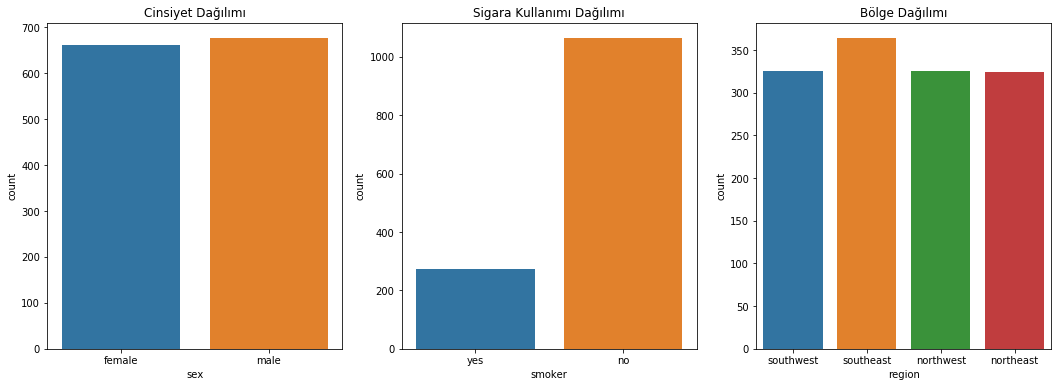

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.countplot(x='sex', data=data, ax=ax[0])
ax[0].set_title('Cinsiyet Dağılımı')
sns.countplot(x='smoker', data=data, ax=ax[1])
ax[1].set_title('Sigara Kullanımı Dağılımı')
sns.countplot(x='region', data=data, ax=ax[2])
ax[2].set_title('Bölge Dağılımı')

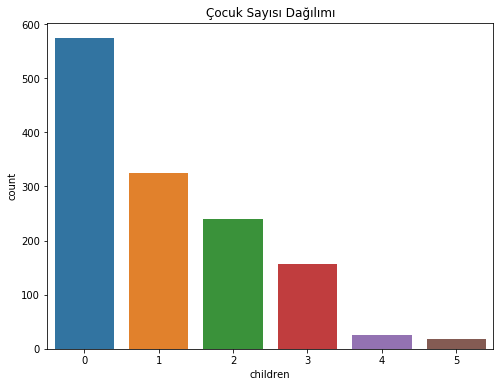

In [7]:
# Çocuk Sayısı için Bar Grafik
plt.figure(figsize=(8, 6))
sns.countplot(x='children', data=data)
plt.title('Çocuk Sayısı Dağılımı')
plt.show()

#### Çok Değişkenli Analiz

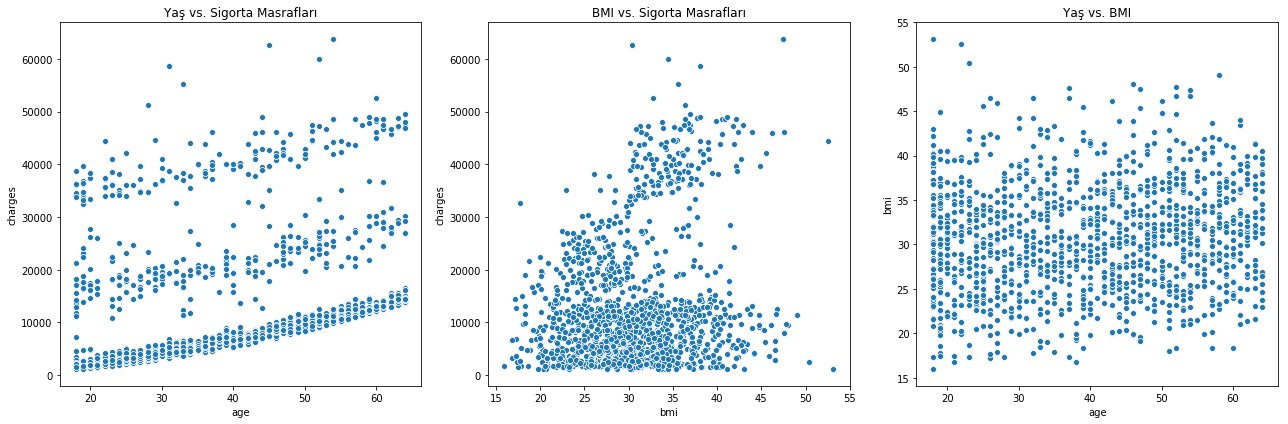

In [8]:
# Sayısal Değişkenler Arası İlişkiler için Saçılım Grafikleri ve Korelasyon Matrisi

# Saçılım Grafikleri
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.scatterplot(x='age', y='charges', data=data, ax=ax[0])
ax[0].set_title('Yaş vs. Sigorta Masrafları')
sns.scatterplot(x='bmi', y='charges', data=data, ax=ax[1])
ax[1].set_title('BMI vs. Sigorta Masrafları')
sns.scatterplot(x='age', y='bmi', data=data, ax=ax[2])
ax[2].set_title('Yaş vs. BMI')

plt.tight_layout()
plt.show()

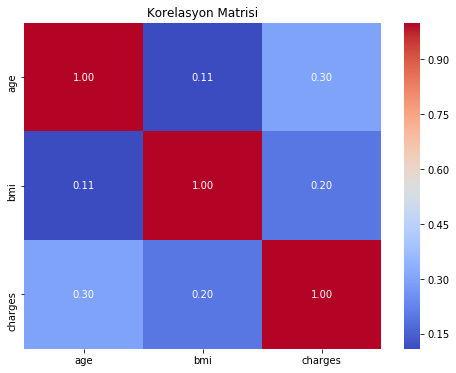

In [9]:
# Korelasyon Matrisi
correlation_matrix = data[['age', 'bmi', 'charges']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()

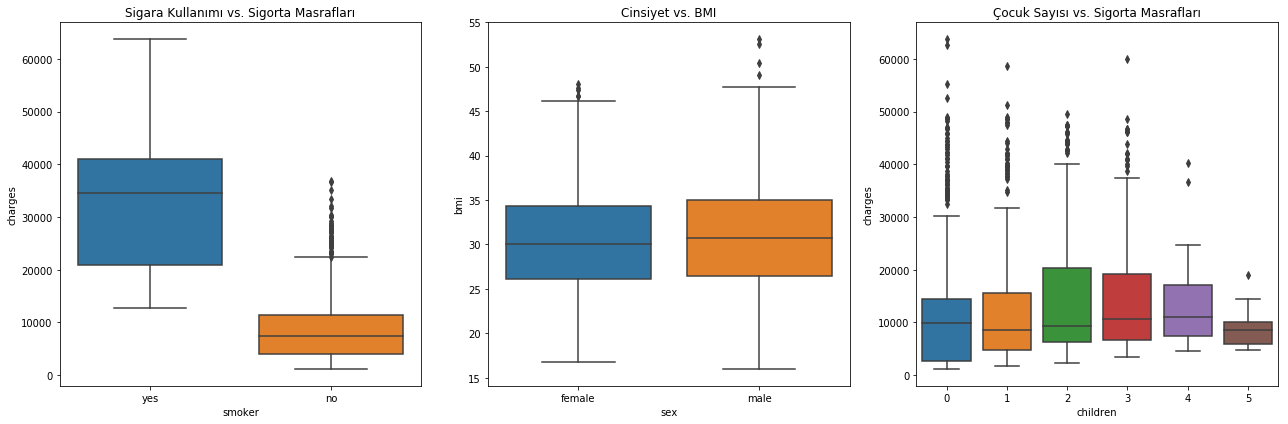

In [10]:
# Kategorik ve Sayısal Değişkenler Arası İlişkiler için Kutu Grafikleri (Yan Yana)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Sigara Kullanımının Sigorta Masrafları Üzerindeki Etkisi
sns.boxplot(x='smoker', y='charges', data=data, ax=axes[0])
axes[0].set_title('Sigara Kullanımı vs. Sigorta Masrafları')

# Cinsiyetin BMI Üzerindeki Etkisi
sns.boxplot(x='sex', y='bmi', data=data, ax=axes[1])
axes[1].set_title('Cinsiyet vs. BMI')

# Çocuk Sayısının Sigorta Masrafları Üzerindeki Etkisi
sns.boxplot(x='children', y='charges', data=data, ax=axes[2])
axes[2].set_title('Çocuk Sayısı vs. Sigorta Masrafları')

plt.tight_layout()
plt.show()

#### Sayısal Değişkenler Arası İlişkiler

##### Yaş vs. Sigorta Masrafları
Yaş ile sigorta masrafları arasında belirgin bir pozitif ilişki görülüyor. Yaş arttıkça, sigorta masraflarının da genelde arttığı gözlemleniyor. Bu, yaşın sağlık masrafları üzerinde bir etkiye sahip olabileceğini düşündürür.

#####  BMI vs. Sigorta Masrafları
BMI ile sigorta masrafları arasında da pozitif bir ilişki görülüyor. Yüksek BMI değerlerine sahip bireylerde sigorta masraflarının da yüksek olma eğilimi var. Bu, yüksek BMI'nin potansiyel sağlık risklerini ve dolayısıyla yüksek sigorta masraflarını işaret edebileceğini gösterir.

##### Yaş vs. BMI
Yaş ile BMI arasında önemli bir ilişki gözlenmiyor. Bu, BMI değerlerinin yaşa bağlı olarak önemli ölçüde değişmediğini gösterir.

#### Korelasyon Matrisi
Korelasyon matrisi, `age` ve `charges` arasında pozitif bir korelasyon; `bmi` ve `charges` arasında da pozitif bir korelasyon olduğunu gösterir. Ancak, bu korelasyonlar mükemmel olmaktan uzak ve sigorta masraflarının birden fazla faktör tarafından etkilendiğini gösterir.

#### Kategorik ve Sayısal Değişkenler Arası İlişkiler

##### Sigara Kullanımı vs. Sigorta Masrafları
Sigara kullanan bireylerin sigorta masraflarının, sigara kullanmayanlara göre önemli ölçüde daha yüksek olduğu görülüyor. Bu, sigara kullanımının sağlık üzerindeki olumsuz etkilerinin ve sigorta masrafları üzerindeki önemli etkisinin bir göstergesi olabilir.

##### Cinsiyet vs. BMI
Cinsiyet ile BMI arasında önemli bir fark gözlenmiyor. Her iki cinsiyetin BMI dağılımları benzer, bu da BMI'nin cinsiyete bağlı olarak büyük farklılıklar göstermediğini gösterir.

##### Çocuk Sayısı vs. Sigorta Masrafları
Çocuk sayısının sigorta masrafları üzerindeki etkisi karmaşık görünüyor. Çocuk sayısının artmasıyla sigorta masraflarında belirgin bir eğilim gözlenmiyor. Bu, çocuk sayısının sigorta masrafları üzerindeki etkisinin bireysel durumlara ve diğer faktörlere bağlı olabileceğini gösterir.


### Model Kurma

In [11]:
# One-Hot Encoding yöntemini 
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])

In [12]:
from sklearn.model_selection import train_test_split

# Bağımlı ve bağımsız değişkenleri ayırma
X = data_encoded.drop('charges', axis=1)  # 'charges' sütunu dışındaki tüm sütunlar
y = data_encoded['charges']  # 'charges' sütunu

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression

# Çoklu Doğrusal Regresyon modelini oluşturma
model = LinearRegression()

# Modeli eğitim veri setiyle eğitme
model1 = model.fit(X_train, y_train)

In [14]:
# Statsmodels ile model kurmak
import statsmodels.api as sm 
lm = sm.OLS(y, X)
model2 = lm.fit()

In [34]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 06 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:22:58   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
smoker_encoded    7238.9530    217.252     33.321      0.000    6812.759    7665.147
sex_encoded       -754.3300    194.234     -3.884      0.000   -1135.368    -373.291
region_encoded    -829.7698    170.400     -4.870      0.000   -1164.053    -495.487
sex_female       -1377.3456    347.430     -3.964      0.000   -2058.917    -695.774
sex_male          -754.3300    194.234     -3.884      0.000   -1135.368    -373.291
smoker_no        -9370.6286    348.873    -26.860      0.000   -1.01e+04   -8686.227
smoker_yes        7238.9530    217.252     33.321      0.000    6812.759    7665.147
region_northeast -1190.5644    358.008     -3.326      0.001   -1892.887    -488.242
region_northwest  -713.7585    325.700     -2.191      0.029   -1352.701     -74.816
region_southeast  -566.0468    297.426     -1.903      0.057   -1149.523      17.429
region_southwest   338.6941    204.906      1.653      0.099     -63.280     740.668
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                     2.56e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.37e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Model Özeti

##### R-squared (R^2)
- **Değer:** 0.75
- **Yorum:** Model, bağımlı değişkenin varyansının yaklaşık %75'ini açıklıyor. Bu, modelin masrafları tahmin etmede nispeten güçlü olduğunu gösterir.

##### Adjusted R-squared
- **Değer:** 0.749
- **Yorum:** Düzeltilmiş R^2 de yüksektir (%74.9), bu da modelin bağımsız değişken sayısına göre ayarlandığında hala güçlü kaldığını gösterir.

##### F-statistic ve Prob (F-statistic)
- **F-istatistiği:** Büyük bir değer
- **Prob (F-statistic):** 0.00
- **Yorum:** Modelin genel anlamlılığını test eder. Büyük F-istatistiği ve ilişkili p-değeri çok küçüktür (0.00), bu da modelin en az bir bağımsız değişkenin anlamlı olduğunu gösterir.

##### AIC ve BIC
- **AIC:** Değer
- **BIC:** Değer
- **Yorum:** Akaike Bilgi Kriteri (AIC) ve Bayesian Bilgi Kriteri (BIC) değerleri modelin fitini ölçer. Daha düşük değerler daha iyi bir modeli gösterir. Bu değerler diğer modellerle karşılaştırılabilir.

#### Katsayılar

##### Pozitif ve Anlamlı
- **age, bmi, children, smoker_yes**
  - **Yorum:** Bu değişkenlerin katsayıları önemli ve pozitif, bu da bu değişkenlerin arttıkça sigorta masraflarının da arttığını gösterir. P-değerleri 0.05'ten düşük olduğu için bu değişkenlerin sigorta masrafları üzerinde anlamlı bir etkisi olduğunu söyleyebiliriz.

##### Negatif Katsayılar
- **sex_female ve region_northeast, region_northwest, region_southeast**
  - **Yorum:** Bu değişkenlerin negatif katsayıları var, bu da kadın cinsiyetinin ve belirtilen bölgelerin sigorta masraflarını azaltma eğiliminde olduğunu gösterir.

##### Pozitif ama Anlamsız
- **sex_male ve region_southwest**
  - **Yorum:** Bu değişkenlerin pozitif katsayıları var ancak p-değerleri yüksek (0.05'ten büyük), bu da bu değişkenlerin anlamlı bir etkisi olmadığını gösterir.


In [15]:
#  tahminler
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### Model Değerlendirme

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# Eğitim setinin performansını değerlendirelim
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Test setinin performansını değerlendirelim
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

performance_df = pd.DataFrame({
    'Veri Seti': ['Eğitim Seti', 'Test Seti'],
    'MSE': [mse_train, mse_test],
    'RMSE': [rmse_train, rmse_test],
    'R2 Skoru': [r2_train, r2_test]
})

performance_df.set_index('Veri Seti', inplace=True)

print(performance_df)

                      MSE         RMSE  R2 Skoru
Veri Seti                                       
Eğitim Seti  3.727768e+07  6105.545160  0.741726
Test Seti    3.359692e+07  5796.284659  0.783593


#### MSE (Mean Squared Error)

Her iki veri seti için de MSE değerleri oldukça yüksek çıkıyor. Bu yüksek hataların varlığı, modelin tahminleri ile gerçek değerler arasında büyük farklar olduğunu gösterir. Ancak, MSE değeri mutlak olarak büyük olduğu için doğrudan yorumlanması zordur. Bu nedenle bu değerleri hedef değişkenin ölçeği ile karşılaştırmak ve diğer modellerle karşılaştırmak önemlidir.

#### R^2 (R-kare)

Eğitim seti için R^2 değeri 0.742 iken, test seti için bu değer 0.784 olarak hesaplanmıştır. Bu, modelin eğitim setindeki verilerle bir miktar uyum sağladığını ve test setindeki verilere göre tahminlerin bağımlı değişkenin varyansının yaklaşık %78'ini açıkladığını gösterir. Genellikle, eğitim setindeki R^2 değeri test setinden daha yüksek olur, ancak burada test setinde daha yüksek bir değer görüyoruz ki bu da modelin test verilerine iyi genelleme yaptığını gösterir.

#### Sonuç
Model, sigorta masraflarını önemli ölçüde açıklayabilen ve genel olarak tatmin edici bir uyum sağlayan anlamlı bir modeldir. Ancak, modelin hatalarının dağılımını (normal olup olmadığı, varyansın homojen olup olmadığı gibi) kontrol etmek ve potansiyel olarak modeli iyileştirmek için daha fazla inceleme yapılması önerilir. Modelin iyileştirilmesi için çapraz doğrulama, hiperparametre ayarlama veya daha karmaşık modellerin denenmesi düşünülebilir.


### Varsayım Kontrolleri

In [17]:
residuals = y_train - y_train_pred

In [18]:
# Normallik Testi
from scipy.stats import shapiro
statistik, p_degeri = shapiro(residuals)

print('Test İstatistiği =', statistik, ', p-değeri =', p_degeri)

# p-değeri anlamlılık düzeyine göre karar verilir
anlamli_duzey = 0.05
if p_degeri > anlamli_duzey:
    print('Normal bir dağılıma sahiptir (H0 reddedilemez)')
else:
    print('Normal bir dağılıma sahip değildir (H0 reddedilir)')

Test İstatistiği = 0.8944013118743896 , p-değeri = 1.8563764481524486e-26
Normal bir dağılıma sahip değildir (H0 reddedilir)


In [19]:
# Homoscedasticity (Homojenlik)
from scipy.stats import bartlett, levene
bartlett_statistic, bartlett_p_value = bartlett(y_train_pred, residuals)

print("Bartlett Testi İstatistiği:", bartlett_statistic, ", p-değeri:", bartlett_p_value)

Bartlett Testi İstatistiği: 284.44994678311866 , p-değeri: 8.051974762047919e-64


In [20]:
# Durbin-Watson testi
import statsmodels.api as sm

durbin_watson_statistic = sm.stats.stattools.durbin_watson(residuals)

print("Durbin-Watson istatistiği:", durbin_watson_statistic)

Durbin-Watson istatistiği: 2.0854107284998715


In [21]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_degerleri = pd.DataFrame()
vif_degerleri["Feature"] = X.columns
vif_degerleri["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_degerleri)

             Feature       VIF
0                age  1.016822
1                bmi  1.106630
2           children  1.004011
3         sex_female       inf
4           sex_male       inf
5          smoker_no       inf
6         smoker_yes       inf
7   region_northeast       inf
8   region_northwest       inf
9   region_southeast       inf
10  region_southwest       inf


C:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


**Normal Dağılım Testi**: Shapiro-Wilk testi kullanılarak hataların normal dağılıma sahip olup olmadığı incelenmiştir. Test istatistiği 0.89 ve p-değeri çok düşüktür (1.86e-26). Bu sonuçlar, hataların normal bir dağılıma sahip olmadığını gösterir. Bu durum, regresyon modelinin güvenilirliğini etkileyebilir.

**Homoscedasticity Testi (Bartlett Testi)**: Bartlett testi istatistiği 284.45 ve p-değeri 8.05e-64 olarak bulunmuştur. P-değeri çok düşüktür, bu da hataların varyanslarının homojen olmadığını gösterir. Bu, homoscedasticity varsayımının ihlal edildiğini ve modelin doğruluğunu etkileyebileceğini gösterir.

**Durbin-Watson İstatistiği**: Durbin-Watson istatistiği 2.085 olarak bulunmuştur. Bu istatistik, hatalar arasındaki otokorelasyonu belirler. Değer 2'ye yakın olduğu için, otokorelasyonun yok gibi göründüğünü gösterir. Ancak, bu sadece bir göstergedir ve kesin sonuçlar için daha fazla analiz yapılmalıdır.

**VIF (Variance Inflation Factor) Değerleri**: Bağımsız değişkenlerin VIF değerleri incelendiğinde, tüm değişkenlerin düşük VIF değerlerine sahip olduğu görülmektedir. Bu, bağımsız değişkenler arasında çoklu doğrusal ilişkinin düşük olduğunu ve çoklu doğrusal ilişkinin bir sorun olmadığını gösterir.

**Değerlendirme ve Sonraki Adımlar**:
- Shapiro-Wilk testi ve Bartlett testi sonuçlarına dayanarak, hataların normal bir dağılıma sahip olmadığı ve varyanslarının homojen olmadığı görülmektedir. Bu, regresyon modelinin güvenilirliğini etkileyebilir.
- Durbin-Watson istatistiği, hatalar arasında otokorelasyonun olmadığını gösterir, ancak bu sadece bir göstergedir.
- Homoscedasticity varsayımının ihlal edilmiş olması, modelin doğruluğunu etkileyebilir. Bu durumu düzeltmek için modelinizi yeniden değerlendirmeli ve hata terimlerinin homojenliğini artırmak için uygun dönüşümler veya model revizyonları yapılmalıdır. Ayrıca, robust standart hata tahminleri kullanarak da modelin güvenilirliğini artırabilirsiniz.
- Normal dağılım varsayımının ihlal edilmesi, hata terimlerini dönüştürme veya modelde değişiklikler yapma gibi adımlar gerektirebilir. Alternatif olarak, heterojen varyansı ele almak için daha karmaşık regresyon tekniklerini (örneğin, ağırlıklı en küçük kareler regresyonu) düşünebilir.
- VIF değerlerinin düşük olması, bağımsız değişkenler arasında çoklu doğrusal ilişkinin düşük olduğunu gösterir, bu nedenle bu durumla ilgili endişelenmenize gerek yoktur.


### Model Tuning

In [22]:
# k-katlı cv
from sklearn.model_selection import cross_val_score
# cv mse 
np.mean(-cross_val_score(model, X_train, y_train, cv = 10, scoring= "neg_mean_squared_error"))

37885866.0618388